Found 12102 images belonging to 2 classes.
Found 2964 images belonging to 2 classes.
Epoch 1/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 45s 98ms/step - accuracy: 0.5629 - loss: 0.8784 - val_accuracy: 0.6325 - val_loss: 0.6093
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.5938 - loss: 0.7104 - val_accuracy: 0.8000 - val_loss: 0.4858
Epoch 3/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 36s 95ms/step - accuracy: 0.6971 - loss: 0.5876 - val_accuracy: 0.7048 - val_loss: 0.5772
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.6562 - loss: 0.6336 - val_accuracy: 0.7000 - val_loss: 0.3994
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 36s 95ms/step - accuracy: 0.7717 - loss: 0.4653 - val_accuracy: 0.8234 - val_loss: 0.3851
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 153us/step - accuracy: 0.8438 - loss: 0.3515 - val_accuracy: 0.9000 - val_loss: 0.2934
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 36s 94ms/step - accuracy: 0.8183 - loss: 0.4068 - val_accuracy: 0.8431 - val_loss: 0.3467
Epoch

378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 149us/step - accuracy: 0.9688 - loss: 0.0784 - val_accuracy: 0.8000 - val_loss: 0.3450


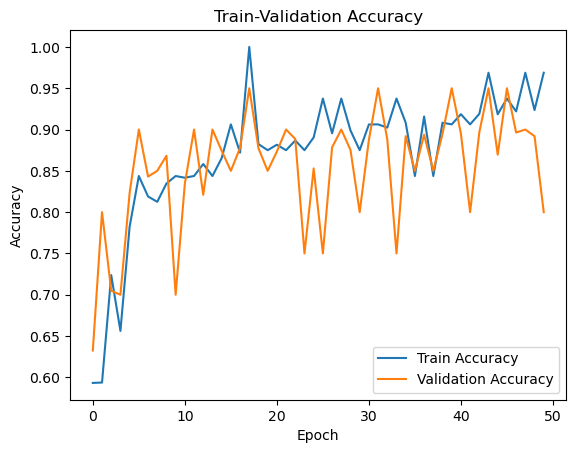

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Görüntü piksel değerlerini 0-1 aralığına yeniden ölçeklendirir.
)

# Doğrulama verileri için ImageDataGenerator nesnesi oluşturuluyor.
validation_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim veri setini yüklemek için flow_from_directory kullanılıyor.
train_generator = train_datagen.flow_from_directory(
    'train',                    # eğitim veri seti dizini
    target_size=(48, 48),       # Görüntülerin hedef boyutu
    batch_size=32,              # Her adımda üretilen veri yığını boyutu
    class_mode='binary',        # İkili sınıflandırma
    color_mode='grayscale',     # Gri ölçekli renk modu
    classes=['happy', 'sad']    # Sınıf adları
)

# Doğrulama veri setini yüklemek için flow_from_directory kullanılıyor.
validation_generator = validation_datagen.flow_from_directory(
    'validation',               # doğrulama veri seti dizini
    target_size=(48, 48),       # Görüntülerin hedef boyutu
    batch_size=32,              # Her adımda üretilen veri yığını boyutu
    class_mode='binary',        # İkili sınıflandırma
    color_mode='grayscale',     # Gri ölçekli renk modu
    classes=['happy', 'sad']    # Sınıf adları
)


# CNN modeli oluşturma
model = Sequential([ #Her katmanın çıktısının sıradaki katmanın girdisi olduğunu anlatır
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)), #yaygın olarak kullanılan aktivasyon fonksiyonu relu 
    BatchNormalization(), # Tüm girdileri normalize eder
    MaxPooling2D(2, 2),  # Resimi max bir değere bölerek birbiriyle çakışmayacak değeri seçer
    Dropout(0.3), # genellemeyi engeller bazı değerleri atarak daha fazla farklı veri görürü bu sayede model dahada özelleştirili
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(), #tek bir boyuta indirger
    
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Dropout katmanı eklendi
    
    Dense(1, activation='sigmoid') #Çıkış katmanıdır, tek bir nörona sahiptir, 2tane çıktı için kullanılan aktivasyon boyutu
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001), #lossdan aldığı değerlere göre ağırlığı değiştirir
              metrics=['accuracy']) # doğru tahmin ölçüsü

# Modeli eğitme
history = model.fit(# verisetini sinir ağına entegre eder
    train_generator, #düzenlenmiş veri seti
    steps_per_epoch=train_generator.samples // 32, #bir eğitim döngüsü boyunca alınacak adım sayısı(bir eğitim boyunca kaç fotonun aynı anda işlenecek)
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Eğitim ve doğrulama doğruluklarını çizdirme
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train-Validation Accuracy')
plt.show()


In [5]:
model.save('onlydropout.h5')